In [1]:
import cv2
import ImageProcess
import numpy as np

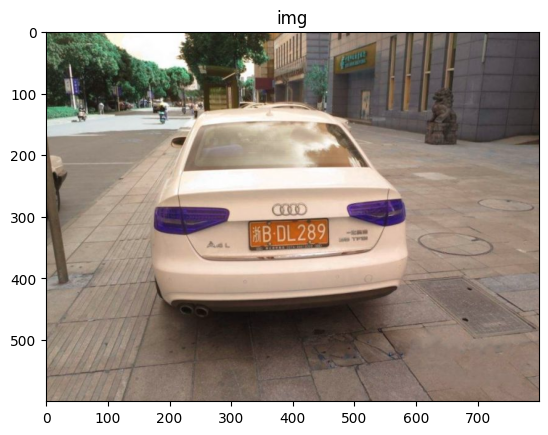

edge detect method: Sobel
post_img.shape: (600, 800)
post_img.dtype uint8
//-------------------------------------------


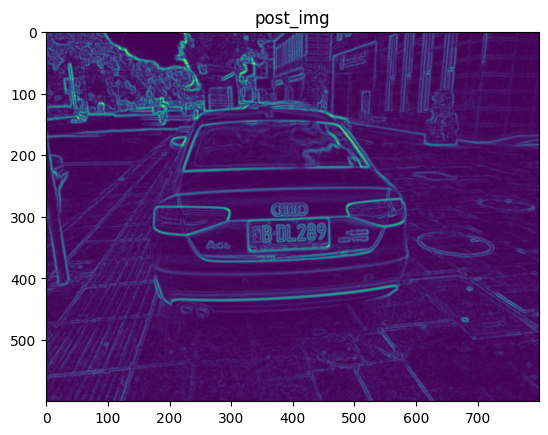

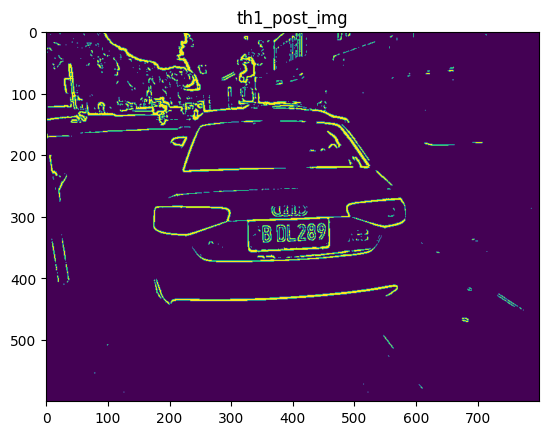

False

In [2]:
# In[]:
import matplotlib.pyplot as plt 

ori_img = cv2.imread("image/02.jpg")

# cv2.imshow('img', ori_img)
# cv2.waitKey(0)

plt.imshow(ori_img)
plt.title('img')
plt.show()
img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
img=ImageProcess.Image_Filter(img,'GaussianBlur',show_image=True,size=5)
post_img=ImageProcess.Edge_Detection(img,'Sobel',gray=False,show_image=True)
#post_img=ImageProcess.Image_Filter(post_img,'GaussianBlur',show_image=True,size=7)
ret, th1 = cv2.threshold(post_img,80,255,cv2.THRESH_BINARY)


# cv2.imshow('post_img', post_img)
# cv2.imshow('th1_post_img', th1)
plt.imshow(post_img)
plt.title('post_img')
plt.show()

plt.imshow(th1)
plt.title('th1_post_img')
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()
cv2.imwrite('ouutput/lenna_final.jpg', th1)

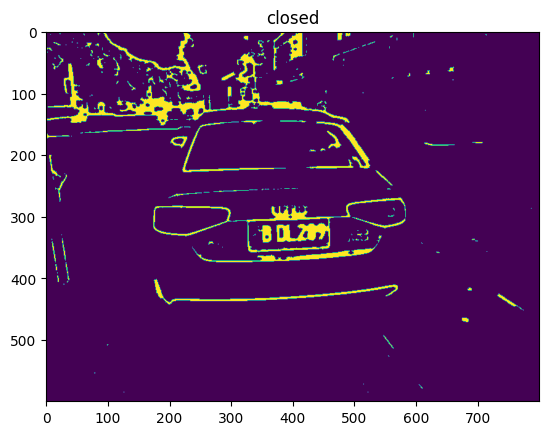

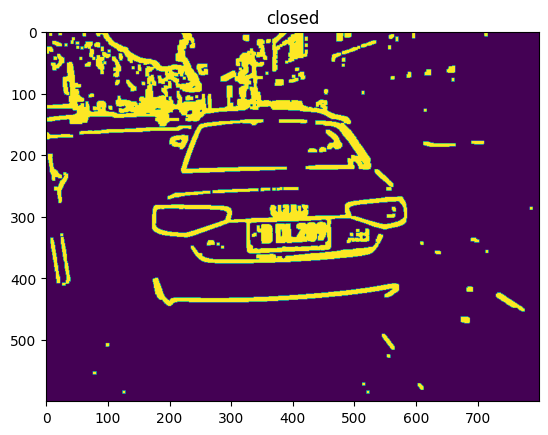

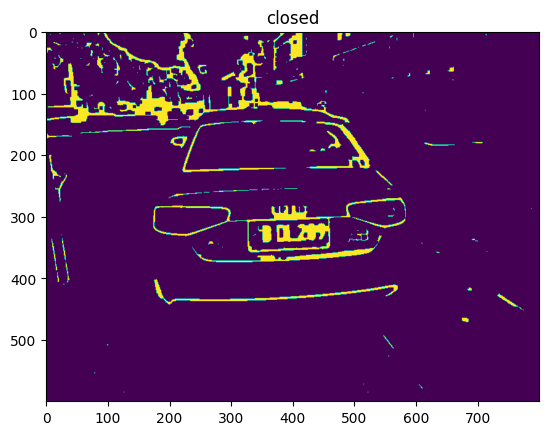

"\n# 參考\nopened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)\ncv2.imshow('dilate erode', opened)\ncv2.waitKey(0)\ncv2.destroyAllWindows()  \n# 膨脹10次，讓輪廓突出\nopened = cv2.dilate(opened, None, iterations=10)\ncv2.imshow('dilate erode', opened)\ncv2.waitKey(0)\ncv2.destroyAllWindows()  \n# 腐蝕4次，去掉細節\nopened = cv2.erode(opened, None, iterations=4)\ncv2.imshow('dilate erode', opened)\ncv2.waitKey(0)\ncv2.destroyAllWindows()  \n\nkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (18, 7))\nopened = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)\ncv2.imshow('morphologyEx2', opened)\ncv2.waitKey(0)\ncv2.destroyAllWindows()  \n\n\n(_, cnts, _) = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)\n"

In [3]:
# In[2]: Morphology

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#執行影象形態學

# 閉運算
closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)
plt.title('closed')
plt.show() 

# 膨脹2次，讓輪廓突出
closed = cv2.dilate(closed, None, iterations=2)
plt.imshow(closed)
plt.title('closed')
plt.show() 

# 腐蝕2次，去掉細節
closed = cv2.erode(closed, None, iterations=2)
plt.imshow(closed)
plt.title('closed')
plt.show() 




# (_, cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
(cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
 
'''
# 參考
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
cv2.imshow('dilate erode', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  
# 膨脹10次，讓輪廓突出
opened = cv2.dilate(opened, None, iterations=10)
cv2.imshow('dilate erode', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  
# 腐蝕4次，去掉細節
opened = cv2.erode(opened, None, iterations=4)
cv2.imshow('dilate erode', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (18, 7))
opened = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
cv2.imshow('morphologyEx2', opened)
cv2.waitKey(0)
cv2.destroyAllWindows()  


(_, cnts, _) = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
'''


/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_3103/2813673466.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


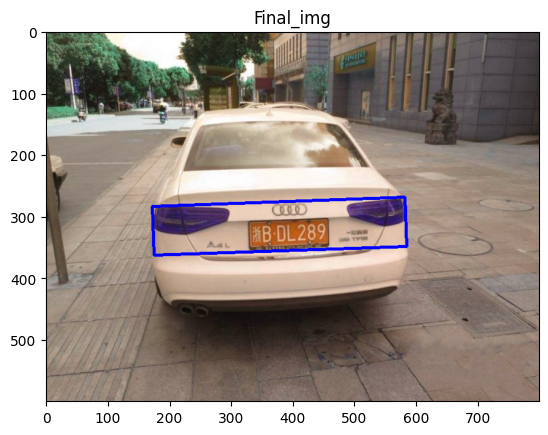

In [5]:
# In[]: determine by opencv

possible_img = ori_img.copy()
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
rect = cv2.minAreaRect(c)
Box = np.int0(cv2.boxPoints(rect))
Final_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)

plt.imshow(Final_img)
plt.title('Final_img')
plt.show() 

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_3103/2440490807.py:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


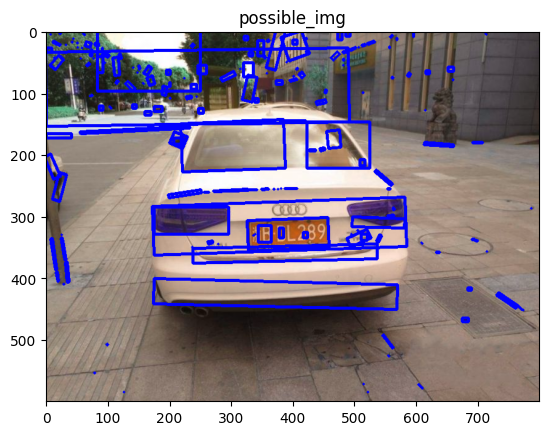

In [7]:
# In[]: determine by 工人智慧
possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=ImageProcess.order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
    cv2.imshow('possible_img', possible_img)
    
plt.imshow(possible_img)
plt.title('possible_img')
plt.show() 

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_3103/288121250.py:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


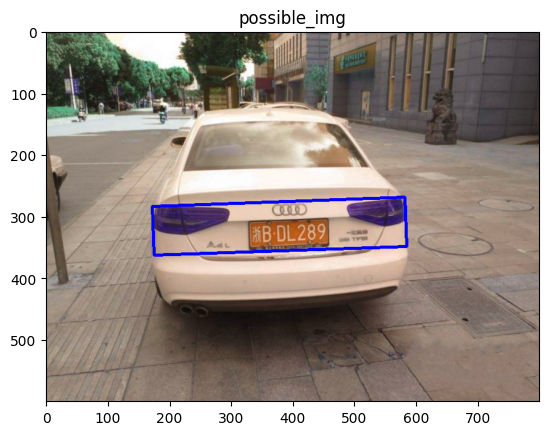

In [8]:
# In[]: determine by 工人智慧

possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=ImageProcess.order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    # determine by 工人智慧
    
    if ((Box[1][0]-Box[0][0])>(Box[3][1]-Box[0][1])) and abs(Box[0][1]-Box[1][1])<30:
        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
        cv2.imshow('possible_img', possible_img)
        break

plt.imshow(possible_img)
plt.title('possible_img')
plt.show() 


In [9]:
''' 回家作業2-- 試著調整配置、參數 嘗試以經驗法則/工人智慧 輸出最佳車牌定位結果 ''' 

' 回家作業2-- 試著調整配置、參數 嘗試以經驗法則/工人智慧 輸出最佳車牌定位結果 '

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  5 00:17:18 2021

@author: jacky
"""

"""
Revised on Mon Sep 19 21:47:15 2022

@reviser: peggy
"""

import cv2
import numpy as np 


def Edge_Detection(img,method,gray=True,XY=(1,1),Weight=(0.5,0.5,0),th=(30,150),size=3,save_image=True,show_image=False):
    # RGB to grayscale
    if gray:
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            print ('Error!!! check your [img] shape/dtype')
            return
       
    # Edge_Detection
    if method=='Sobel':
        img_x = cv2.Sobel(img, cv2.CV_16S, XY[0], 0, ksize=size) # 計算水平
        img_y = cv2.Sobel(img, cv2.CV_16S, 0, XY[1], ksize=size) # 計算垂直

    elif method=='Scharr':
        img_x = cv2.Scharr(img,cv2.CV_64F, XY[0], 0)
        img_y = cv2.Scharr(img,cv2.CV_64F, 0, XY[1])
    
    elif method=='Laplacian':
        post_img = cv2.Laplacian(img, cv2.CV_16S, ksize=size)
        post_img = cv2.convertScaleAbs(post_img)
        
    elif method=='Canny':
        if gray:
            post_img = cv2.Canny(img, th[0], th[1], apertureSize=size)
        else:
            print ('Error!!! Canny must be converted to grayscale, set gray=True')
            return
    else:
        print ('method have to be Sobel, Scharr, Laplacian or Canny')
        
    
    # addWeight for Sobel and Scharr
    if method=='Sobel' or method=='Scharr':
        absX = cv2.convertScaleAbs(img_x)
        absY = cv2.convertScaleAbs(img_y)
        post_img=cv2.addWeighted(absX, Weight[0], absY, Weight[1], Weight[2])
       
    # save image or not    
    if save_image: cv2.imwrite('ouutput/lenna_'+method+'.jpg', post_img) 
    
    print ('edge detect method:',method)
    print ('post_img.shape:',post_img.shape)
    print ('post_img.dtype',post_img.dtype)
    print ("//-------------------------------------------")
    
    # show image or not 
    if show_image:
        plt.imshow(post_img)
        plt.title('post_img')
        plt.show() 
        
    return post_img


def Image_Filter (img,method,size=3,show_image=False): 
    if method=='blur':
        img = cv2.blur(img, (size,size))
    elif method=='GaussianBlur':
        img = cv2.GaussianBlur(img, (size, size), 0)
    elif method=='medianBlur':
        img = cv2.medianBlur(img, size)
    elif method=='bilateralFilter':
        img = cv2.bilateralFilter(img,size,75,75)
    else:
        print ('method have to be blur, GaussianBlur, medianBlur or bilateralFilter')
    if show_image:
        plt.imshow(img)
        plt.title('Image_Filter')
        plt.show() 

    return img

def order_points_new(pts):
    # sort the points based on their x-coordinates
    xSorted = pts[np.argsort(pts[:, 0]), :]

    # grab the left-most and right-most points from the sorted
    # x-roodinate points
    leftMost = xSorted[:2, :]
    rightMost = xSorted[2:, :]
    if leftMost[0,1]!=leftMost[1,1]:
        leftMost=leftMost[np.argsort(leftMost[:,1]),:]
    else:
        leftMost=leftMost[np.argsort(leftMost[:,0])[::-1],:]
    (tl, bl) = leftMost
    if rightMost[0,1]!=rightMost[1,1]:
        rightMost=rightMost[np.argsort(rightMost[:,1]),:]
    else:
        rightMost=rightMost[np.argsort(rightMost[:,0])[::-1],:]
    (tr,br)=rightMost
    # return the coordinates in top-left, top-right,
    # bottom-right, and bottom-left order
    return np.array([tl, tr, br, bl], dtype="int")

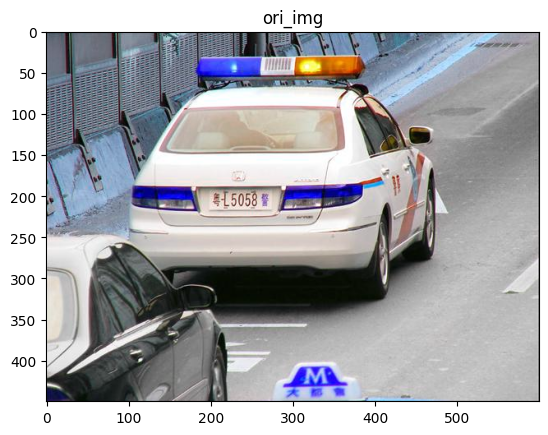

In [16]:
ori_img = cv2.imread("image/01.jpg")


plt.imshow(ori_img)
plt.title('ori_img')
plt.show() 

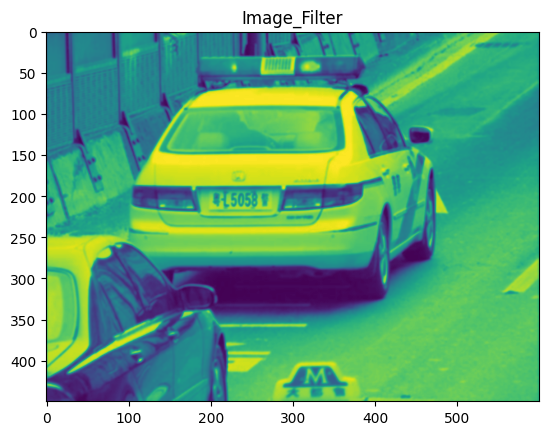

edge detect method: Sobel
post_img.shape: (450, 600)
post_img.dtype uint8
//-------------------------------------------


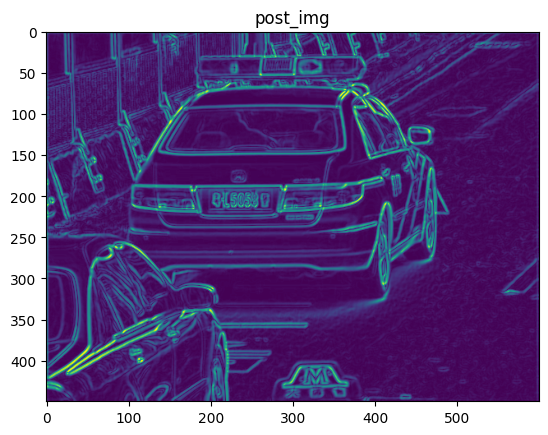

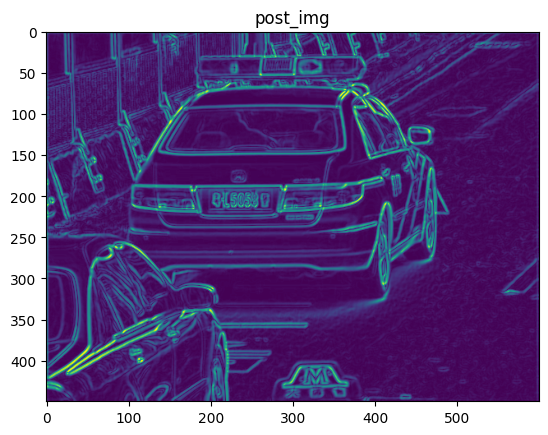

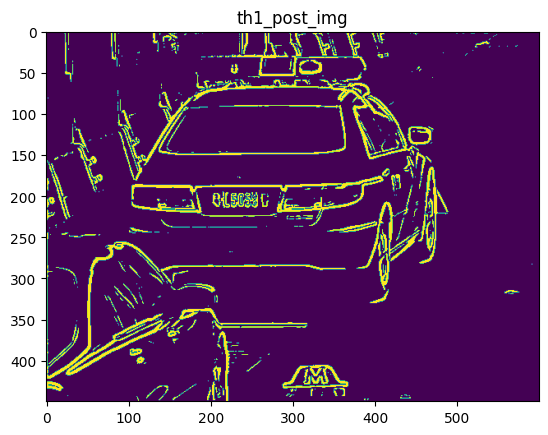

In [17]:

# In[1]: Edge Detection

img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)
img=Image_Filter(img,'GaussianBlur',show_image=True,size=5)
post_img=Edge_Detection(img,'Sobel',gray=False,show_image=True)
#post_img=ImageProcess.Image_Filter(post_img,'GaussianBlur',show_image=True,size=7)
ret, th1 = cv2.threshold(post_img,85,255,cv2.THRESH_BINARY)



plt.imshow(post_img)
plt.title('post_img')
plt.show() 


plt.imshow(th1)
plt.title('th1_post_img')
plt.show() 
#cv2.imwrite('output/02_final.jpg', th1)


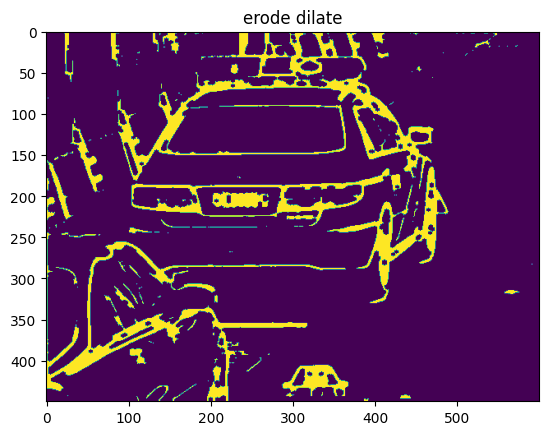

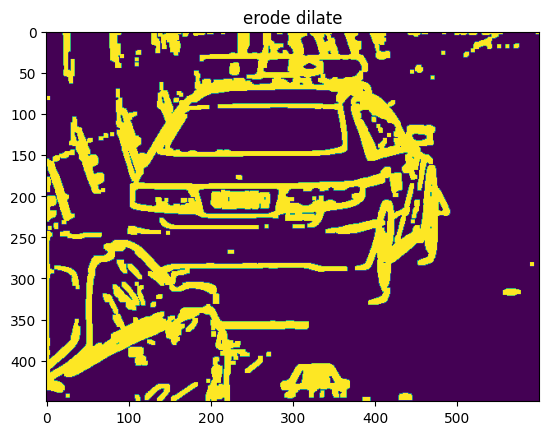

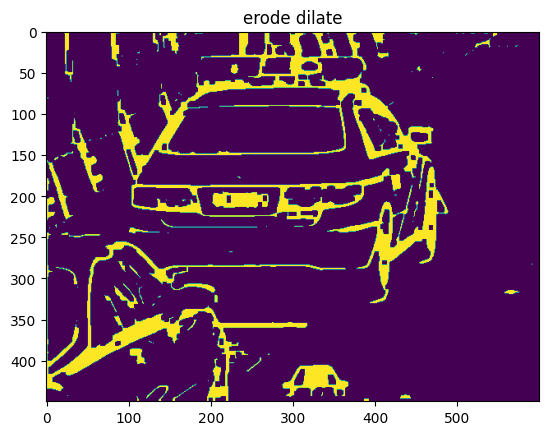

In [18]:
# In[2]: Morphology

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#執行影象形態學

# 閉運算
closed = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed)
plt.title('erode dilate')
plt.show() 
# 膨脹2次，讓輪廓突出
closed = cv2.dilate(closed, None, iterations=2)
plt.imshow(closed)
plt.title('erode dilate')
plt.show()  
# 腐蝕2次，去掉細節
closed = cv2.erode(closed, None, iterations=2)
plt.imshow(closed)
plt.title('erode dilate')
plt.show() 


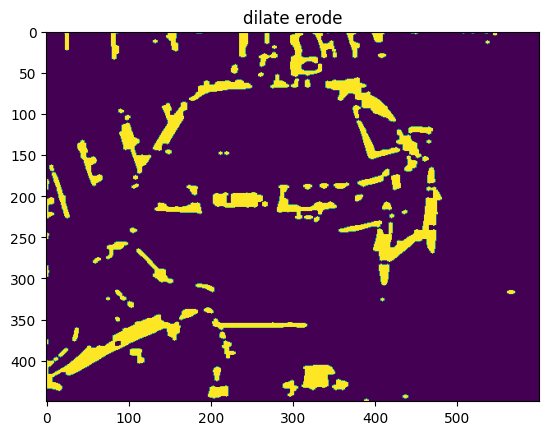

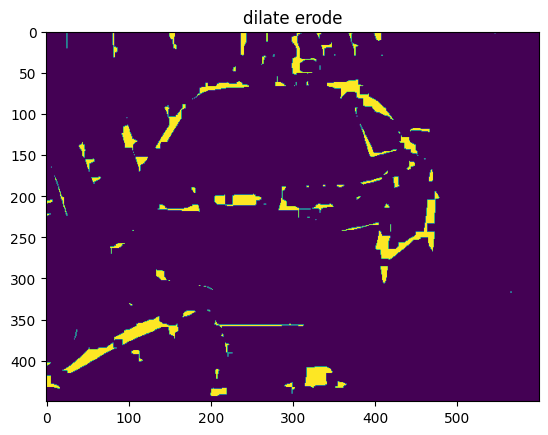

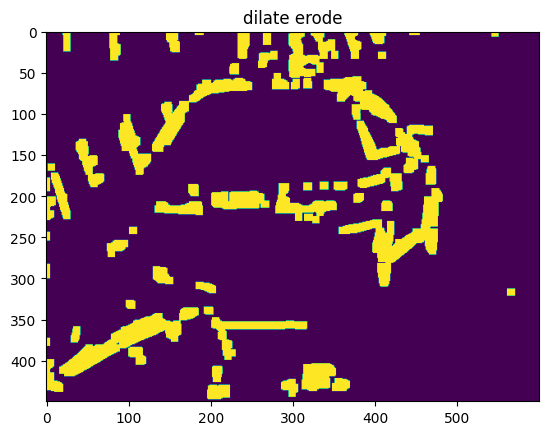

In [19]:
# (_, cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
(cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


# 參考

# 開運算
opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
plt.imshow(opened)
plt.title('dilate erode')
plt.show() 
# 腐蝕3次，去掉細節
opened = cv2.erode(opened, None, iterations=2)
plt.imshow(opened)
plt.title('dilate erode')
plt.show() 
# 膨脹10次，讓輪廓突出
opened = cv2.dilate(opened, None, iterations=4)
plt.imshow(opened)
plt.title('dilate erode')
plt.show() 
  

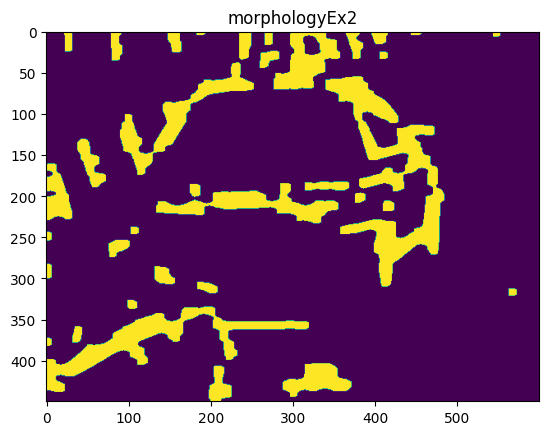

In [21]:

# 閉運算
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (12, 7))
opened = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
plt.imshow(opened)
plt.title('morphologyEx2')
plt.show() 

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_3103/1770588393.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


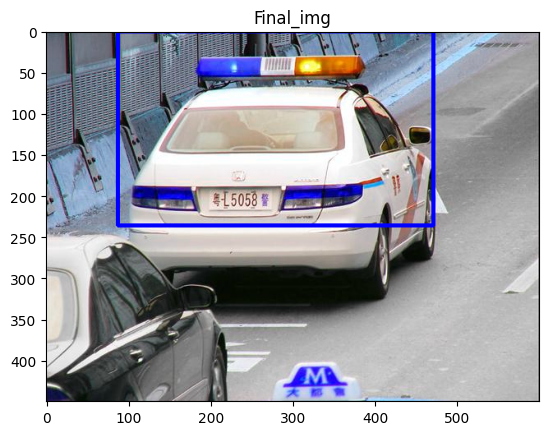

In [22]:
# (_, cnts, _) = cv2.findContours(opened,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
(cnts, _) = cv2.findContours(closed,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)



# In[3]: determine by opencv

possible_img = ori_img.copy()
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
rect = cv2.minAreaRect(c)
Box = np.int0(cv2.boxPoints(rect))
Final_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
plt.imshow(Final_img)
plt.title('Final_img')
plt.show() 

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_3103/4144042435.py:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


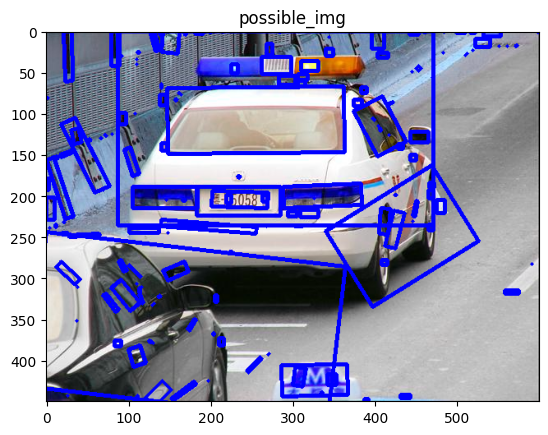

In [30]:
# In[]: determine by 工人智慧,抓取多個可能的方框

possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
plt.imshow(possible_img)
plt.title('possible_img')
plt.show() 
    

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_3103/3798277368.py:10: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


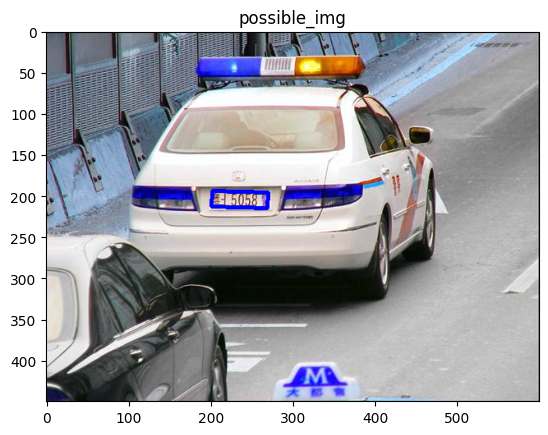

False

In [31]:
# In[]: determine by 工人智慧,抓取指定的方框

possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    # determine by 工人智慧,指定方框條件設定,同學們可以在這裡調整條件
    
    if ((Box[1][0]-Box[0][0])>(Box[3][1]-Box[0][1])) and 10<abs(Box[1][1]-Box[2][1])<20  and 50<abs(Box[0][0]-Box[1][0])<111  and abs(Box[0][1]-Box[1][1])<20  :
        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
        cv2.imshow('possible_img', possible_img)
        break
    
plt.imshow(possible_img)
plt.title('possible_img')
plt.show() 

cv2.imwrite('output/01.jpg', possible_img)

/var/folders/5c/z2dd4yzx5w78s1v0vb9y2cxr0000gn/T/ipykernel_3103/545855364.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  Box = np.int0(cv2.boxPoints(rect))


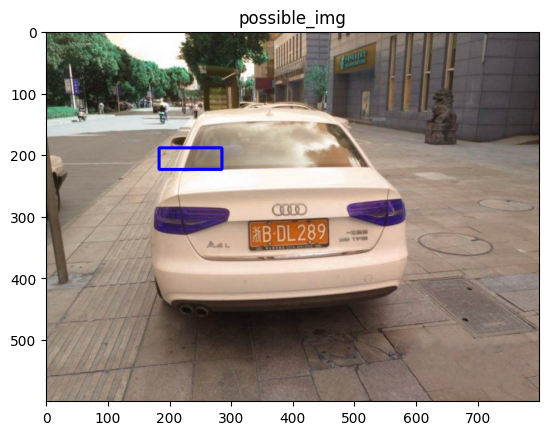

False

In [39]:
# In[]: determine by 工人智慧,抓取指定的方框
ori_img = cv2.imread("image/02.jpg")

possible_img = ori_img.copy()

for c in sorted(cnts, key=cv2.contourArea, reverse=True):
    #print (c)
      
    rect = cv2.minAreaRect(c)
    #print ('rectt', rect)
    Box = np.int0(cv2.boxPoints(rect))
    #print ('Box', Box)    
    Box=order_points_new(Box) # return  左上/右上/右下/左下 (x,y)
    #print ('Box2',Box)
    
    # determine by 工人智慧,指定方框條件設定,同學們可以在這裡調整條件
    
    if ((Box[1][0]-Box[0][0])>(Box[3][1]-Box[0][1])) and 10<abs(Box[1][1]-Box[2][1])<100  and 50<abs(Box[0][0]-Box[1][0])<111  and abs(Box[0][1]-Box[1][1])<20  :
        possible_img = cv2.drawContours(possible_img, [Box], -1, (0, 0, 255), 3)
        cv2.imshow('possible_img', possible_img)
        break
    
plt.imshow(possible_img)
plt.title('possible_img')
plt.show() 

cv2.imwrite('output/01.jpg', possible_img)